<a href="https://colab.research.google.com/github/2303A51803/data_mining/blob/main/outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [20]:
np.random.seed(42)
data=np.random.normal(0,1,100) #normal distribution
outliers=np.random.uniform(5,10,5) #Artificial outliers

In [36]:

df=pd.DataFrame(data_with_outliers,columns=['Value'])
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(df)
print(lower_bound)
print(upper_bound)
print(Q1)
print(Q3)


        Value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549

[105 rows x 1 columns]
-2.3232332563637335
2.372622015963629
-0.5622875292409727
0.6116762888408679


In [37]:
outliers_iqr=df[(df['Value']< lower_bound) | (df['Value']> upper_bound)]

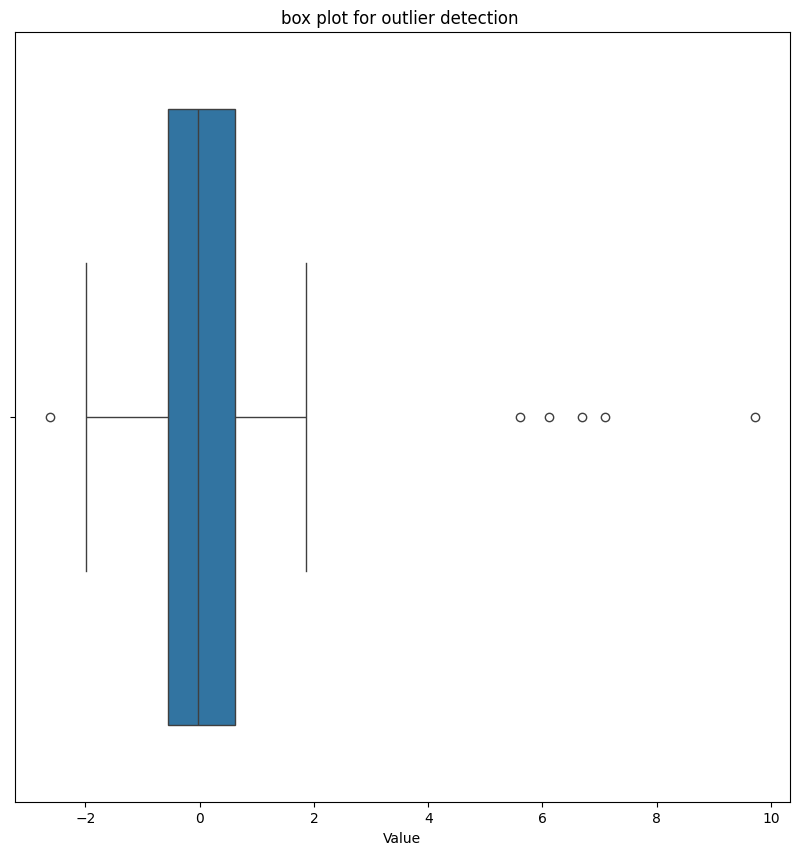

In [34]:
z_scores=stats.zscore(df['Value'])
outliers_zscore=df[np.abs(z_scores)>3]
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Value'])
plt.title("box plot for outlier detection ")
plt.show()

In [40]:
df_capped=df.copy()
df_capped['Value']=np.clip(df_capped['Value'],lower_bound,upper_bound)
df_removed=df.copy()
print(df_removed)

        Value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549

[105 rows x 1 columns]


In [41]:
df_removed=df_removed[((df_removed['Value']>=lower_bound) & (df_removed['Value']<=upper_bound))]
print(df_removed)

       Value
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


In [42]:
df_imputed=df.copy()
median_value=df['Value'].median()
df_imputed['Value']=np.where((df_imputed['Value']<lower_bound) | (df_imputed['Value']>upper_bound),median_value,df_imputed['Value'])
print (df_imputed)


        Value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100 -0.035826
101 -0.035826
102 -0.035826
103 -0.035826
104 -0.035826

[105 rows x 1 columns]


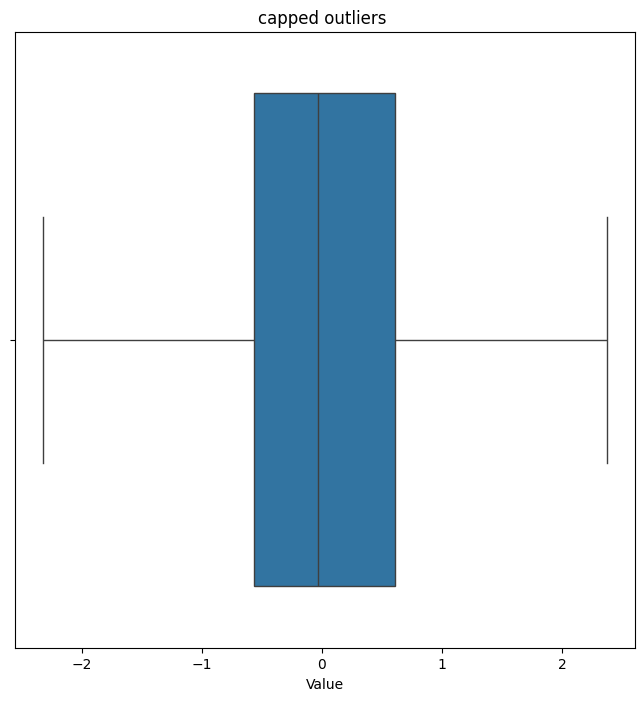

In [47]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_capped['Value'])
plt.title("capped outliers ")
plt.show()